In [1]:
import numpy as np
import pandas as pd

In [10]:
from datetime import datetime 
from datetime import timedelta

In [11]:
now = datetime.now()
now

datetime.datetime(2026, 2, 23, 16, 26, 37, 73737)

In [12]:
now.year, now.month, now.day

(2026, 2, 23)

In [13]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8,15)

In [14]:
delta

datetime.timedelta(days=926, seconds=56700)

In [15]:
delta.days

926

In [16]:
delta.seconds

56700

In [19]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [20]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [21]:
stamp = datetime(2011, 1, 3)

In [22]:
str(stamp)

'2011-01-03 00:00:00'

In [23]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [25]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
idx = pd.to_datetime(datestrs + [None])

idx 

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[us]', freq=None)

In [26]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]


In [27]:
ts = pd.Series(np.random.standard_normal(6), index=dates)

In [28]:
ts

2011-01-02   -0.858982
2011-01-05   -0.924289
2011-01-07   -0.633596
2011-01-08   -1.092923
2011-01-10   -0.525025
2011-01-12   -1.092421
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[us]', freq=None)

In [30]:
ts.index.dtype

dtype('<M8[us]')

In [32]:
stamp = ts.index[0]

In [33]:
stamp

Timestamp('2011-01-02 00:00:00')

In [35]:
ts[stamp]

np.float64(-0.8589817204824297)

In [37]:
longer_ts = pd.Series(np.random.standard_normal(1000),
 index=pd.date_range("2000-01-01", periods=1000))

In [38]:
longer_ts

2000-01-01    0.165376
2000-01-02    1.512929
2000-01-03   -0.901509
2000-01-04    0.595945
2000-01-05   -0.788663
                ...   
2002-09-22   -0.815982
2002-09-23    0.669513
2002-09-24    0.994799
2002-09-25    0.289096
2002-09-26   -1.446990
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts["2001"]

2001-01-01    1.142380
2001-01-02   -0.328066
2001-01-03   -0.034276
2001-01-04    1.127050
2001-01-05   -1.133583
                ...   
2001-12-27   -0.280633
2001-12-28   -0.329390
2001-12-29    0.824346
2001-12-30   -0.538523
2001-12-31    0.387552
Freq: D, Length: 365, dtype: float64

In [40]:
longer_ts["2001-05": "2001-07"]

2001-05-01    1.536820
2001-05-02   -1.122409
2001-05-03   -0.608015
2001-05-04    0.271434
2001-05-05   -1.282551
                ...   
2001-07-27    2.309802
2001-07-28   -0.635321
2001-07-29    0.495564
2001-07-30   -3.299994
2001-07-31    0.158851
Freq: D, Length: 92, dtype: float64

In [42]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100,4)), index=dates, columns=["Colorado", "Texas", "New York", "Ohio"])

In [45]:
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.947990,-1.322378,0.456061,1.264785
2001-05-09,1.599196,-1.052496,1.948989,-1.331147
2001-05-16,-0.100335,0.535010,1.539550,1.008108
2001-05-23,-0.172361,0.948524,-1.496626,-1.146551
2001-05-30,0.862726,-0.320034,1.506519,0.702346


# 11.3 Date ranges, freqs and shifting 

In [29]:
import pandas as pd 
import numpy as np
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
from datetime import datetime

In [8]:
index = pd.date_range("2012-04-01", "2012-06-01")

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [9]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[us]', freq='D')

In [10]:
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[us]', freq='D')

In [13]:
hour = Hour()
hour

<Hour>

In [14]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [17]:
pd.date_range("01-01-2000", "31-01-2000", freq="4h")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               ...
               '2000-01-29 12:00:00', '2000-01-29 16:00:00',
               '2000-01-29 20:00:00', '2000-01-30 00:00:00',
               '2000-01-30 04:00:00', '2000-01-30 08:00:00',
               '2000-01-30 12:00:00', '2000-01-30 16:00:00',
               '2000-01-30 20:00:00', '2000-01-31 00:00:00'],
              dtype='datetime64[us]', length=181, freq='4h')

In [18]:
Hour(2) + Minute(30)

<150 * Minutes>

In [19]:
Minute(15)

<15 * Minutes>

In [22]:
ts = pd.Series(np.random.standard_normal(4), index=pd.date_range("01-01-2000", periods=4, freq="ME"))
ts

2000-01-31    0.147566
2000-02-29   -0.161490
2000-03-31   -1.770793
2000-04-30   -0.065986
Freq: ME, dtype: float64

In [23]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.147566
2000-04-30   -0.161490
Freq: ME, dtype: float64

In [24]:
ts/ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -2.094359
2000-03-31    9.965355
2000-04-30   -0.962736
Freq: ME, dtype: float64

In [25]:
ts.shift(2, freq="ME")

2000-03-31    0.147566
2000-04-30   -0.161490
2000-05-31   -1.770793
2000-06-30   -0.065986
Freq: ME, dtype: float64

In [31]:
now = datetime(2011,11,17)
now +3 * Day()

Timestamp('2011-11-20 00:00:00')

In [33]:
now + MonthEnd()
now+MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [34]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [37]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [38]:
ts = pd.Series(np.random.standard_normal(20), index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts

2000-01-15    0.460071
2000-01-19    1.773071
2000-01-23   -0.205652
2000-01-27    0.800603
2000-01-31    0.586600
2000-02-04   -1.749640
2000-02-08   -1.498613
2000-02-12   -0.030837
2000-02-16    0.824567
2000-02-20   -0.793134
2000-02-24    0.617536
2000-02-28   -1.800440
2000-03-03   -0.022196
2000-03-07    1.881002
2000-03-11   -2.167656
2000-03-15   -0.592589
2000-03-19    0.057745
2000-03-23    1.546800
2000-03-27    1.853233
2000-03-31    0.115968
Freq: 4D, dtype: float64

In [39]:
ts.groupby(MonthEnd().rollforward).mean()

2000-01-31    0.682939
2000-02-29   -0.632937
2000-03-31    0.334039
dtype: float64

In [41]:
ts.resample("ME").mean()

2000-01-31    0.682939
2000-02-29   -0.632937
2000-03-31    0.334039
Freq: ME, dtype: float64

# 11.5 Periods and Period Arithmetic

In [44]:
p = pd.Period("2011", freq="Y-DEC")
p

Period('2011', 'Y-DEC')

In [45]:
p+5

Period('2016', 'Y-DEC')

In [46]:
p-2

Period('2009', 'Y-DEC')

In [47]:
p.asfreq("M", how = "start")

Period('2011-01', 'M')

In [48]:
p.asfreq("M", how="end")

Period('2011-12', 'M')

In [49]:
p.asfreq("M")

Period('2011-12', 'M')

In [50]:
p = pd.Period("2026", freq="Y-JUN") 
p

Period('2026', 'Y-JUN')

In [51]:
p.asfreq("M", how="start")

Period('2025-07', 'M')

In [52]:
p.asfreq("M", how="end")

Period('2026-06', 'M')

In [53]:
p = pd.Period("Aug-2025", "M")

In [54]:
p.asfreq("Y-JUN")

Period('2026', 'Y-JUN')

In [55]:
periods = pd.period_range("2006", "2009", freq="Y-DEC")

In [56]:
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts

2006   -0.060189
2007   -0.059723
2008   -1.252147
2009    0.978232
Freq: Y-DEC, dtype: float64

In [57]:
ts.asfreq("M", how="start")

2006-01   -0.060189
2007-01   -0.059723
2008-01   -1.252147
2009-01    0.978232
Freq: M, dtype: float64

In [58]:
p = pd.Period("2020Q4", freq="Q-JAN")
p

Period('2020Q4', 'Q-JAN')

In [59]:
p.asfreq("D", how="start")

Period('2019-11-01', 'D')

In [60]:
p.asfreq("D", how="end")

Period('2020-01-31', 'D')

In [61]:
data = pd.read_csv("examples/macrodata.csv")

In [62]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [63]:
data["year"]

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [64]:
data["quarter"]

0      1
1      2
2      3
3      4
4      1
      ..
198    3
199    4
200    1
201    2
202    3
Name: quarter, Length: 203, dtype: int64

# 11.6 Resampling and Frequency Conversion

In [67]:
dates = pd.date_range("2000-01-01", periods =100)

In [68]:
ts = pd.Series(np.random.standard_normal(len(dates)), index = dates)

In [69]:
ts

2000-01-01    1.073463
2000-01-02   -0.255845
2000-01-03    0.275635
2000-01-04   -0.332370
2000-01-05    0.569240
                ...   
2000-04-05    1.133862
2000-04-06   -1.164108
2000-04-07   -1.017581
2000-04-08   -0.388864
2000-04-09    1.677951
Freq: D, Length: 100, dtype: float64

In [71]:
ts.resample("ME").mean()

2000-01-31    0.185236
2000-02-29   -0.192833
2000-03-31    0.318065
2000-04-30    0.095113
Freq: ME, dtype: float64

In [73]:
dates = pd.date_range("2000-01-01", periods=12, freq="min")

In [74]:
ts = pd.Series(np.arange(len(dates)), index=dates)

In [75]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: min, dtype: int64

In [76]:
ts.resample("5min").sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5min, dtype: int64

In [77]:
ts.resample("5min", closed="right").sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [78]:
from pandas.tseries.frequencies import to_offset

In [80]:
result=ts.resample("5min", closed="right", label="right").sum()
result.index=result.index+to_offset("-1s")
result

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5min, dtype: int64

In [81]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)

In [82]:
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,9,11,1,11
2000-01-01 00:05:00,8,8,2,2
2000-01-01 00:10:00,0,5,0,5


In [83]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
 index=pd.date_range("2000-01-01", periods=2,
 freq="W-WED"),
 columns=["Colorado", "Texas", "New York", "Ohio"])

In [84]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.008982,-0.572097,0.302713,-0.380767
2000-01-12,-0.535612,0.089433,0.462393,-0.474266


In [85]:
df_daily = frame.resample("D").asfreq()

In [86]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.008982,-0.572097,0.302713,-0.380767
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.535612,0.089433,0.462393,-0.474266


In [88]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.008982,-0.572097,0.302713,-0.380767
2000-01-06,0.008982,-0.572097,0.302713,-0.380767
2000-01-07,0.008982,-0.572097,0.302713,-0.380767
2000-01-08,0.008982,-0.572097,0.302713,-0.380767
2000-01-09,0.008982,-0.572097,0.302713,-0.380767
2000-01-10,0.008982,-0.572097,0.302713,-0.380767
2000-01-11,0.008982,-0.572097,0.302713,-0.380767
2000-01-12,-0.535612,0.089433,0.462393,-0.474266


# 11.7 Moving window functions

In [89]:
close_px_all = pd.read_csv("examples/stock_px.csv",
 parse_dates=True, index_col=0)

In [90]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

In [91]:
close_px = close_px.resample("B").ffill()

In [96]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<Axes: >

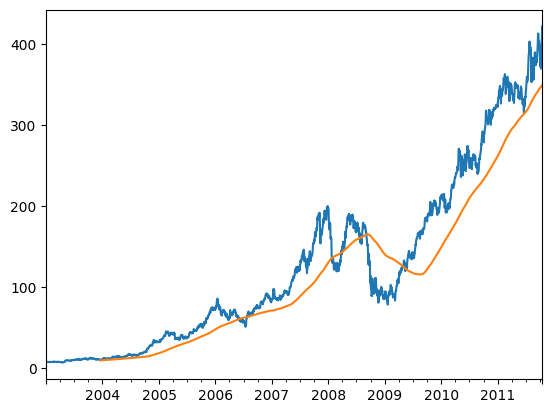

In [97]:
close_px["AAPL"].plot()
close_px["AAPL"].rolling(250).mean().plot()

In [100]:
import matplotlib.pyplot as plt
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()

<Figure size 640x480 with 0 Axes>

In [101]:
std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
Freq: B, Name: AAPL, dtype: float64

<Axes: >

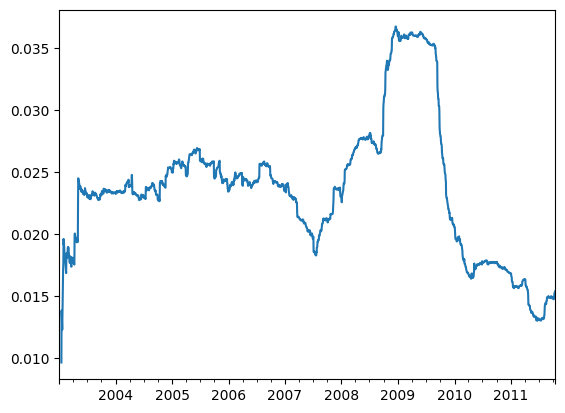

In [102]:
std250.plot()

In [103]:
expanding_mean = std250.expanding().mean()

In [104]:
plt.style.use("grayscale")

<Axes: >

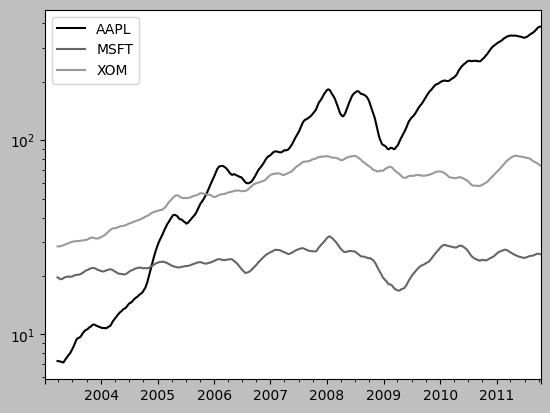

In [106]:
close_px.rolling(60).mean().plot(logy=True)

In [108]:
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=20).mean()

In [109]:
ewa30 = aapl_px.ewm(span=30).mean()

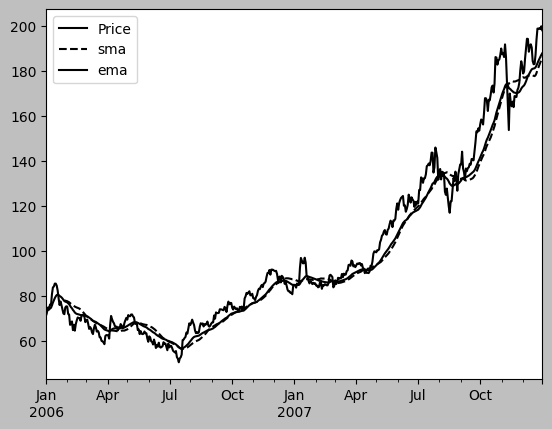

In [110]:
aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="sma")
ewa30.plot(style="k-", label="ema")
plt.legend()